Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime,timedelta
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Loading the data into a dataframe



In [4]:
df=pd.read_csv("monatszahlen2209_verkehrsunfaelle.csv")
df.tail()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0
2085,Verkehrsunfälle,Verletzte und Getötete,2000,200012,515.0,NaN,-10.90,NaN,588.0


Updating the dataframe with only the first 5 important columns

In [5]:
df = df[["MONATSZAHL", "AUSPRÄGUNG", "JAHR", "MONAT", "WERT"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MONATSZAHL  2086 non-null   object 
 1   AUSPRÄGUNG  2086 non-null   object 
 2   JAHR        2086 non-null   int64  
 3   MONAT       2086 non-null   object 
 4   WERT        2002 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.6+ KB


Creating a new dataframe with filtered data (Category: 'Alkoholunfälle' and Type: 'insgesamt')

In [6]:
df_filtered = df[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRÄGUNG'] == 'insgesamt')]
df_filtered.head()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 297
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MONATSZAHL  298 non-null    object 
 1   AUSPRÄGUNG  298 non-null    object 
 2   JAHR        298 non-null    int64  
 3   MONAT       298 non-null    object 
 4   WERT        286 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.0+ KB


Visualizing the data

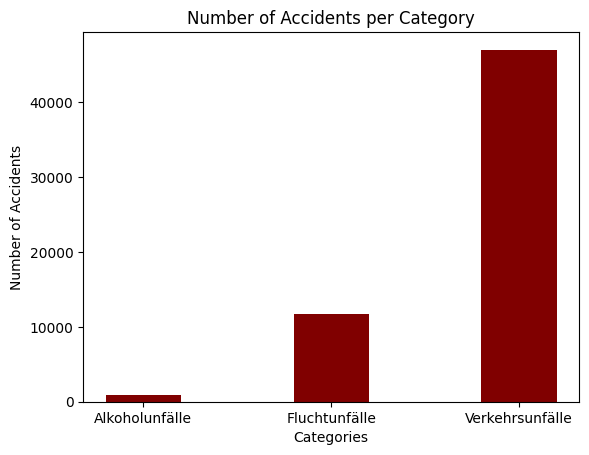

In [7]:
# Bar Graph for the number of accidents per category
plt.bar(df.MONATSZAHL, df.WERT, color ='maroon', width = 0.4)
plt.xlabel("Categories")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per Category")
plt.show()

Creating a new dataframe having only 'summe' values from MONAT column

In [8]:
df_summe = df_filtered[df_filtered['MONAT'] == 'Summe']
df_summe.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
12,Alkoholunfälle,insgesamt,2021,Summe,383.0
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
38,Alkoholunfälle,insgesamt,2019,Summe,434.0
51,Alkoholunfälle,insgesamt,2018,Summe,398.0
64,Alkoholunfälle,insgesamt,2017,Summe,409.0


Removing records having 'summe' values from MONAT column 

In [9]:
df_filtered = df_filtered.drop(df_filtered[df_filtered.MONAT == 'Summe'].index)
df_filtered.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN


Visualizing the filtered data with only 'summe' values

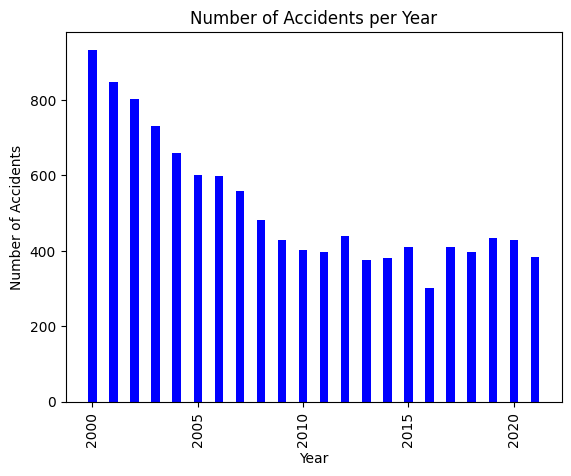

In [10]:
# Bar Graph for the Number of Accidents per Year
plt.bar(df_summe.JAHR, df_summe.WERT, color ='blue', width = 0.4)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per Year")
plt.xticks(rotation=90)
# plt.figure(figsize=(10,8))
plt.show()

Creating a new column 'MONTH' with only month values extracted from the 'MONAT' column

In [11]:
df_filtered['MONTH']= df_filtered['MONAT'].str[4:]
df_filtered['JAHR']=df_filtered['JAHR'].astype(str)

df_filtered.head()


,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,MONTH
0,Alkoholunfälle,insgesamt,2022,202201,NaN,01
1,Alkoholunfälle,insgesamt,2022,202202,NaN,02
2,Alkoholunfälle,insgesamt,2022,202203,NaN,03
3,Alkoholunfälle,insgesamt,2022,202204,NaN,04
4,Alkoholunfälle,insgesamt,2022,202205,NaN,05


Creating a new 'date' column with date format YYYY-MM-DD

In [12]:
df_filtered['date']=pd.to_datetime(df_filtered['JAHR']+ '-' + df_filtered['MONTH'])
df_filtered.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,MONTH,date
0,Alkoholunfälle,insgesamt,2022,202201,NaN,01,2022-01-01
1,Alkoholunfälle,insgesamt,2022,202202,NaN,02,2022-02-01
2,Alkoholunfälle,insgesamt,2022,202203,NaN,03,2022-03-01
3,Alkoholunfälle,insgesamt,2022,202204,NaN,04,2022-04-01
4,Alkoholunfälle,insgesamt,2022,202205,NaN,05,2022-05-01


Creating a new dataframe with only 'date' and 'WERT' columns

In [13]:
df_date_value=df_filtered[['date','WERT']]
df_date_value

,date,WERT
0,2022-01-01,NaN
1,2022-02-01,NaN
2,2022-03-01,NaN
3,2022-04-01,NaN
4,2022-05-01,NaN
...,...,...
293,2000-08-01,77.0
294,2000-09-01,84.0
295,2000-10-01,83.0
296,2000-11-01,71.0


The 'date' column is set as the new index for the dataframe 

In [14]:
df_date_value.set_index('date',inplace=True)


The data is sorted in ascending according to 'date' index 

In [15]:
df_date_value=df_date_value.sort_index(ascending=True)
df_date_value

,WERT
date,
2000-01-01,78.0
2000-02-01,53.0
2000-03-01,73.0
2000-04-01,78.0
2000-05-01,96.0
...,...
2022-08-01,NaN
2022-09-01,NaN
2022-10-01,NaN


Two new dataframes 'part1' and 'part2' are created with:

part1: contains data from the year 2000 to 2020

part2: contains data for the year 2021

In [16]:
part1 = df_date_value.loc[:'2020-12-01']
part2 = df_date_value.loc['2021-01-01':'2021-12-01']


Visualizing 'part1' data

<Axes: xlabel='date'>

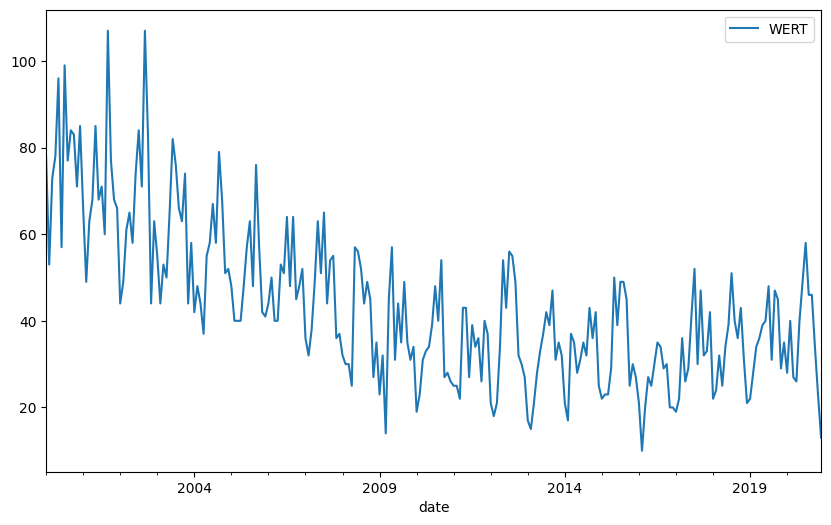

In [17]:
part1.plot(figsize=(10,6))

A function 'adf_test' takes a time series data as an input and performs an Augmented Dickey-Fuller test (adfuller) to check whether the data is stationary or not.

p-value > 0.05 then Non-Stationery data. Else, Stationery data.  

The function prints the test statistics, p-value, and a concludes based on the p-value, whether to reject or accept the null hypothesis.

 

In [18]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

To determine if the 'part1' WERT data is stationary or not, an Augmented Dickey-Fuller test will be performed. The purpose of this test is to assess whether the data satisfies the stationarity assumption required for implementing the ARIMA modeling technique.

In [19]:
adf_test(part1['WERT'])

ADF Statistics: -2.778474040626481
p- value: 0.061414994217069516
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


From the above analysis, We get p-value: 0.06141 indicating it is non-stationary.

A new column 'WERT First Difference' is created in the 'part1' DataFrame by taking the first difference of the 'WERT' column, which is calculated by subtracting the value of 'WERT' at time t-1 from its value at time t. 

This transformation is commonly used to convert a non-stationary time series into a stationary one by removing the trend component.


In [20]:
part1['WERT First Difference']=part1['WERT']-part1['WERT'].shift(1)

C:\Users\siddh\AppData\Local\Temp\ipykernel_20792\2739009505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part1['WERT First Difference']=part1['WERT']-part1['WERT'].shift(1)


In [21]:
part1.head()

,WERT,WERT First Difference
date,,
2000-01-01,78.0,NaN
2000-02-01,53.0,-25.0
2000-03-01,73.0,20.0
2000-04-01,78.0,5.0
2000-05-01,96.0,18.0


Similarly, the Twelveth difference is calculated

In [22]:
part1['WERT 12 Difference']=part1['WERT']-part1['WERT'].shift(12)
part1

C:\Users\siddh\AppData\Local\Temp\ipykernel_20792\3109135272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part1['WERT 12 Difference']=part1['WERT']-part1['WERT'].shift(12)


,WERT,WERT First Difference,WERT 12 Difference
date,,,
2000-01-01,78.0,NaN,NaN
2000-02-01,53.0,-25.0,NaN
2000-03-01,73.0,20.0,NaN
2000-04-01,78.0,5.0,NaN
2000-05-01,96.0,18.0,NaN
...,...,...,...
2020-08-01,46.0,-12.0,15.0
2020-09-01,46.0,0.0,-1.0
2020-10-01,34.0,-12.0,-11.0


The Augmented Dickey-Fuller test is performed on the 'WERT 12 Difference' column of the 'part1' DataFrame after dropping the missing values to determine if the time series data is stationary or not.

In [23]:
adf_test(part1['WERT 12 Difference'].dropna())

ADF Statistics: -3.358728737351916
p- value: 0.012448890266152023
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Plot the autocorrelation function (ACF) and Partial autocorrelation function (PACF) of the 'WERT First Difference' column of the 'part1' DataFrame after dropping the missing values to visually examine the correlation between the time series and its lags.

c:\Users\siddh\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


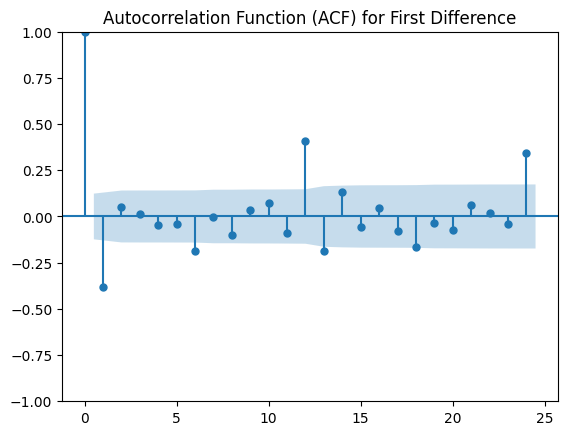

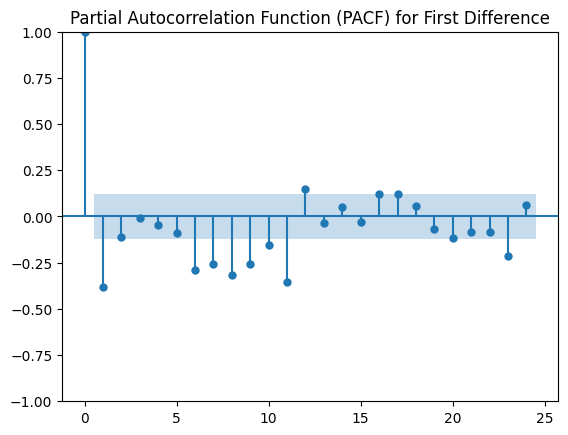

In [24]:
acf=plot_acf(part1['WERT First Difference'].dropna(), title="Autocorrelation Function (ACF) for First Difference" )
pacf=plot_pacf(part1['WERT First Difference'].dropna(), title="Partial Autocorrelation Function (PACF) for First Difference")

Similarly, Plot the autocorrelation function (ACF) and Partial autocorrelation function (PACF) of the 'WERT 12 Difference' column of the 'part1' dataFrame after dropping the missing values to visually examine the correlation between the time series and its lags.

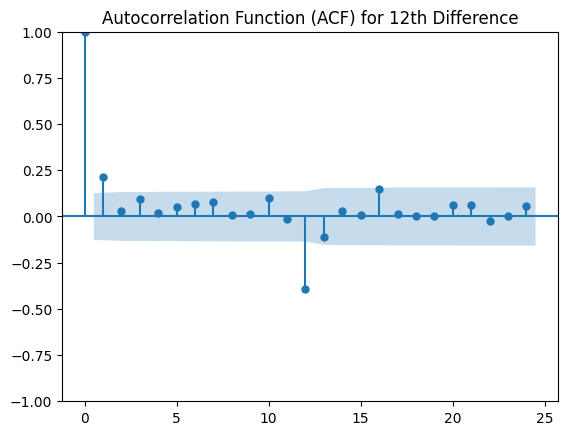

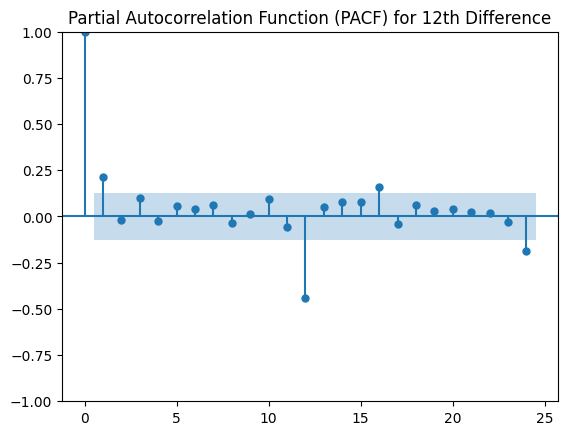

In [25]:
acf12=plot_acf(part1['WERT 12 Difference'].dropna(), title="Autocorrelation Function (ACF) for 12th Difference")
pacf12=plot_pacf(part1['WERT 12 Difference'].dropna(), title="Partial Autocorrelation Function (PACF) for 12th Difference")

### Visualizing the WERT data
We can observe that the First difference and 12 difference are similar for WERT data

<Axes: xlabel='date'>

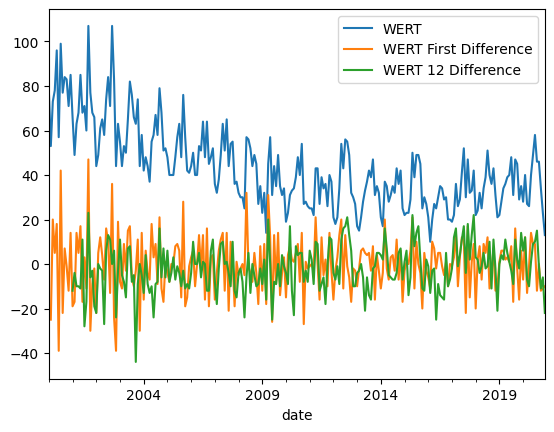

In [26]:
part1.plot()

The end dates are defined for the training and testing periods for a time series model as December 1, 2018 and December 1, 2020 respectively.


In [27]:
train_dataset_end=datetime(2018,12,1)
test_dataset_end=datetime(2020,12,1)

 The 'part1' DataFrame is split into two subsets, 'train_data' and 'test_data':
 
 'train_data' contains all the data before the 'train_dataset_end' date.
 
 'test_data'  contains data between 'train_dataset_end' and 'test_dataset_end' dates.

In [28]:
train_data=part1[:train_dataset_end]
test_data=part1[train_dataset_end+timedelta(days=1):test_dataset_end]
test_data.head()

,WERT,WERT First Difference,WERT 12 Difference
date,,,
2019-01-01,22.0,1.0,0.0
2019-02-01,28.0,6.0,4.0
2019-03-01,34.0,6.0,2.0
2019-04-01,36.0,2.0,11.0
2019-05-01,39.0,3.0,5.0


Setting the prediction start and end date:

pred_start_date: '2019-01-01'

pred_end_date: '2020-12-01'



In [29]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print((pred_start_date))
print(pred_end_date)

2019-01-01 00:00:00
2020-12-01 00:00:00


### Model 1: ARIMA
Fits an ARIMA model to the 'WERT' column of the 'part1' DataFrame using the order (p,d,q) = (1,1,1), where 'p' is the order of the autoregressive term, 'd' is the degree of differencing, and 'q' is the order of the moving average term. The fitted model is stored in the 'model_fit' variable.

In [30]:
model=ARIMA(part1['WERT'],order=(1,1,1))
model_fit=model.fit()

c:\Users\siddh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\siddh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\siddh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA Model Summary

In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   WERT   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -962.013
Date:                Sun, 12 Mar 2023   AIC                           1930.027
Time:                        17:18:38   BIC                           1940.603
Sample:                    01-01-2000   HQIC                          1934.283
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4003      0.073      5.464      0.000       0.257       0.544
ma.L1         -0.9261      0.031    -30.005      0.000      -0.987      -0.866
sigma2       124.3188     10.243     12.137      0.000     104.243     144.394
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):                12.68
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Predictions are made for the values of the 'WERT' column of the 'test_data' dataFrame using the ARIMA model stored in the 'model_fit' variable, and calculates the residuals as the difference between the actual 'WERT' values and the predicted values for the same time period.

In [32]:
pred=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['WERT']-pred
residuals

date
2019-01-01    -5.988746
2019-02-01     0.053365
2019-03-01     3.647770
2019-04-01     2.976657
2019-05-01     4.956222
2019-06-01     4.389281
2019-07-01    11.664772
2019-08-01    -9.399104
2019-09-01    14.099887
2019-10-01     4.653926
2019-11-01   -10.889306
2019-12-01     2.319491
2020-01-01    -7.253502
2020-02-01     8.084239
2020-03-01   -10.316246
2020-04-01    -5.350608
2020-05-01     9.444915
2020-06-01    12.143366
2020-07-01    16.643861
2020-08-01    -0.188094
2020-09-01     4.629107
2020-10-01    -7.712843
2020-11-01   -13.339792
2020-12-01   -17.951357
dtype: float64

Following Produces a kernel density plot of the residuals of the ARIMA model, showing the distribution of the residuals and how closely it follows a normal distribution.

<Axes: ylabel='Density'>

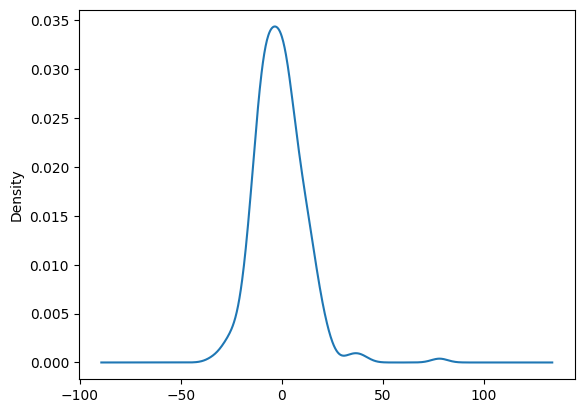

In [33]:
model_fit.resid.plot(kind='kde')

A new column called 'Predicted_ARIMA' in the 'test_data' dataFrame is created, and assigns the predicted values generated by the ARIMA model stored in the 'pred' variable to that column.

In [34]:
test_data['Predicted_ARIMA']=pred

C:\Users\siddh\AppData\Local\Temp\ipykernel_20792\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


A line plot is generated for the actual 'WERT' values and the predicted values generated by the ARIMA model for the 'test_data' DataFrame, allowing us to visually compare the two sets of values.

<Axes: xlabel='date'>

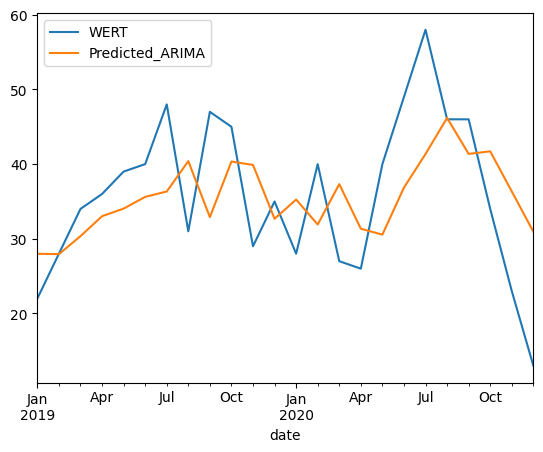

In [35]:
test_data[['WERT','Predicted_ARIMA']].plot()

In [36]:
part1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2000-01-01 to 2020-12-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WERT                   252 non-null    float64
 1   WERT First Difference  251 non-null    float64
 2   WERT 12 Difference     240 non-null    float64
dtypes: float64(3)
memory usage: 16.0 KB


It  generates a list of future dates using DateOffset and creates an empty DataFrame future_datest_df with the same columns as part1 for predicting future values

In [37]:
future_dates=[part1.index[-1]+ DateOffset(months=x)for x in range(0,12)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=part1.columns)
future_datest_df.info()
future_dates 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2021-01-01 to 2021-11-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   WERT                   0 non-null      object
 1   WERT First Difference  0 non-null      object
 2   WERT 12 Difference     0 non-null      object
dtypes: object(3)
memory usage: 352.0+ bytes


[Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00')]

Concatenating the Future dataset with part1 dataset and setting the index for start date and end date

In [38]:
future_df=pd.concat([part1,future_datest_df])

pred_future_start_date=future_df.index[-12]
pred_future_end_date=future_df.index[-1]
print(pred_future_start_date)
print(pred_future_end_date)



2020-12-01 00:00:00
2021-11-01 00:00:00


Predicting using ARIMA model for the above dates and plotting our predictions

,WERT,WERT First Difference,WERT 12 Difference,forecast
2020-12-01,13.0,-10.0,-22.0,30.951357
2021-01-01,NaN,NaN,NaN,25.622543
2021-02-01,NaN,NaN,NaN,30.675038
2021-03-01,NaN,NaN,NaN,32.697428
2021-04-01,NaN,NaN,NaN,33.506941
2021-05-01,NaN,NaN,NaN,33.830969
2021-06-01,NaN,NaN,NaN,33.960670
2021-07-01,NaN,NaN,NaN,34.012586
2021-08-01,NaN,NaN,NaN,34.033366
2021-09-01,NaN,NaN,NaN,34.041684


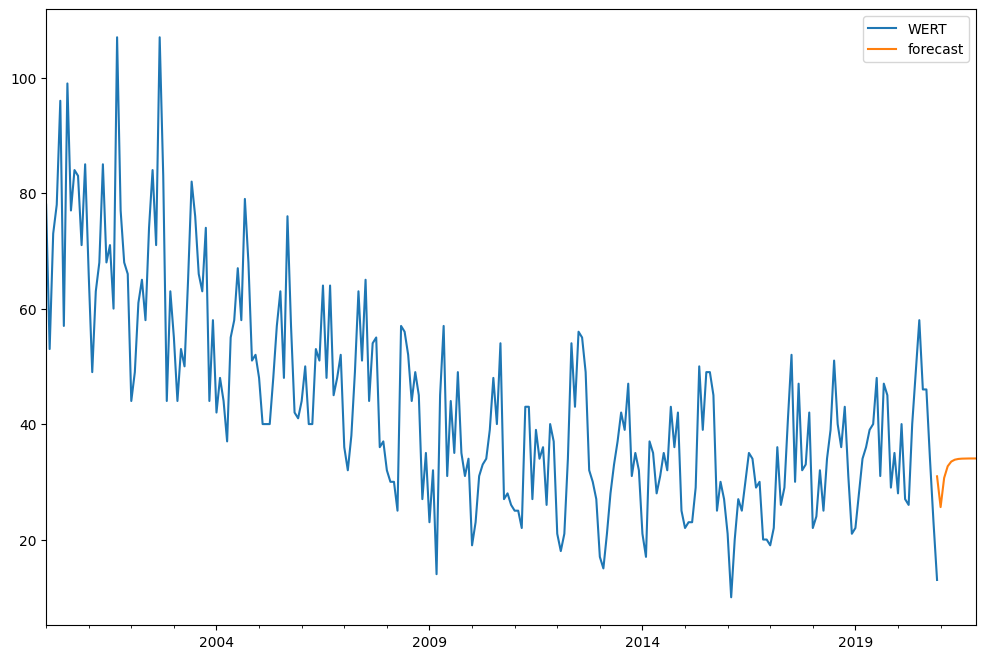

In [39]:
future_df['forecast'] = model_fit.predict(start = pred_future_start_date , end = pred_future_end_date)  
future_df[['WERT', 'forecast']].plot(figsize=(12, 8))
future_df.tail(12)

Calculating residuals for our predicted values with the ground truth values 

In [40]:
prediction=future_df['forecast'].tail(12)
residuals=part2['WERT']-prediction
prediction

2020-12-01    30.951357
2021-01-01    25.622543
2021-02-01    30.675038
2021-03-01    32.697428
2021-04-01    33.506941
2021-05-01    33.830969
2021-06-01    33.960670
2021-07-01    34.012586
2021-08-01    34.033366
2021-09-01    34.041684
2021-10-01    34.045014
2021-11-01    34.046347
Name: forecast, dtype: float64

Comparing the Ground truth values and predicted values

In [41]:
part2['Predicted_ARIMA']=prediction
part2

C:\Users\siddh\AppData\Local\Temp\ipykernel_20792\285492397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part2['Predicted_ARIMA']=prediction


,WERT,Predicted_ARIMA
date,,
2021-01-01,16.0,25.622543
2021-02-01,14.0,30.675038
2021-03-01,24.0,32.697428
2021-04-01,16.0,33.506941
2021-05-01,24.0,33.830969
2021-06-01,48.0,33.960670
2021-07-01,44.0,34.012586
2021-08-01,46.0,34.033366
2021-09-01,54.0,34.041684


<Axes: xlabel='date'>

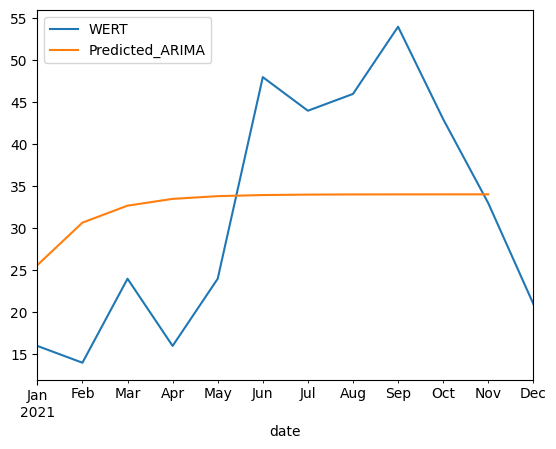

In [42]:
part2[['WERT','Predicted_ARIMA']].plot()

### Model 2: SARIMA

Here, The seasonal order parameter of SARIMA model is (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity. Where,  s is an integer giving the periodicity (number of periods in season), often it is 4 for quarterly data or 12 for monthly data. Default is no seasonal effect.

In [43]:
model_SARIMA=SARIMAX(part1['WERT'],order=(1,1,1),seasonal_order=(1,1,1,12))
model_SARIMA_fit=model_SARIMA.fit()


c:\Users\siddh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\siddh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA model Summary

In [44]:
model_SARIMA_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               WERT   No. Observations:                  252
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -853.812
Date:                            Sun, 12 Mar 2023   AIC                           1717.624
Time:                                    17:18:40   BIC                           1735.006
Sample:                                01-01-2000   HQIC                          1724.628
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1090      0.076      1.443      0.149      -0.039       0.257
ma.L1         -0.9164      0.037    -24.976      0.000      -0.988      -0.844
ar.S.L12      -0.0725      0.092     -0.784      0.433      -0.254       0.109
ma.S.L12      -0.7049      0.086     -8.187      0.000      -0.874      -0.536
sigma2        70.6576      5.740     12.310      0.000      59.408      81.908
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.29
Prob(Q):                              0.93   Prob(JB):                         0.04
Heteroskedasticity (H):               0.58   Skew:                             0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Predicting using SARIMA model and calculating Residuals w.r.t ground truth value

In [45]:
pred=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['WERT']-pred
residuals

date
2019-01-01     1.918615
2019-02-01     7.653341
2019-03-01     3.703026
2019-04-01     5.867147
2019-05-01     2.059827
2019-06-01     0.557161
2019-07-01    -0.487521
2019-08-01    -8.331929
2019-09-01     5.407224
2019-10-01     9.062362
2019-11-01    -5.259693
2019-12-01     4.665277
2020-01-01     3.861192
2020-02-01    14.690214
2020-03-01    -8.702344
2020-04-01    -6.491180
2020-05-01     2.534433
2020-06-01     7.942780
2020-07-01     6.444545
2020-08-01     4.834988
2020-09-01    -1.423171
2020-10-01    -7.474938
2020-11-01   -10.540324
2020-12-01   -18.326465
dtype: float64

Visualizing predicted values w.r.t ground truth values

In [46]:
test_data['Predicted_SARIMA']=pred

C:\Users\siddh\AppData\Local\Temp\ipykernel_20792\1545568125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred


<Axes: xlabel='date'>

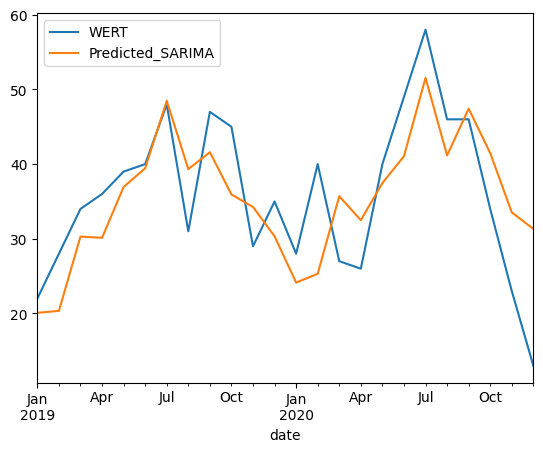

In [47]:
test_data[['WERT','Predicted_SARIMA']].plot()

In [48]:
# residuals_df = pd.concat([part2['Predicted_ARIMA'],future_datest_df])

### By comparing residual values for ARIMA and SARIMA models, we can conclude that, in this case, SARIMA model performs better than ARIMA model.

Now, We will forcast values for the year 2021

In [49]:
future_dates=[part1.index[-1]+ DateOffset(months=x)for x in range(0,13)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=part1.columns)
future_datest_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2021-01-01 to 2021-12-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   WERT                   0 non-null      object
 1   WERT First Difference  0 non-null      object
 2   WERT 12 Difference     0 non-null      object
dtypes: object(3)
memory usage: 384.0+ bytes


Preprocessing 'future_df' and creating start date and end date for our df

In [50]:
future_df=pd.concat([part1,future_datest_df])
pred_future_start_date=future_df.index[-12]
pred_future_end_date=future_df.index[-1]
print(pred_future_start_date)
print(pred_future_end_date)

2021-01-01 00:00:00
2021-12-01 00:00:00


Predicting the values for the above dates using best model (SARIMA) and visualizing the predicted values

,WERT,WERT First Difference,WERT 12 Difference,forecast
2021-01-01,NaN,NaN,NaN,22.048068
2021-02-01,NaN,NaN,NaN,27.438505
2021-03-01,NaN,NaN,NaN,30.766735
2021-04-01,NaN,NaN,NaN,30.568512
2021-05-01,NaN,NaN,NaN,37.855028
2021-06-01,NaN,NaN,NaN,41.668237
2021-07-01,NaN,NaN,NaN,50.681486
2021-08-01,NaN,NaN,NaN,39.083181
2021-09-01,NaN,NaN,NaN,44.452926
2021-10-01,NaN,NaN,NaN,37.986739


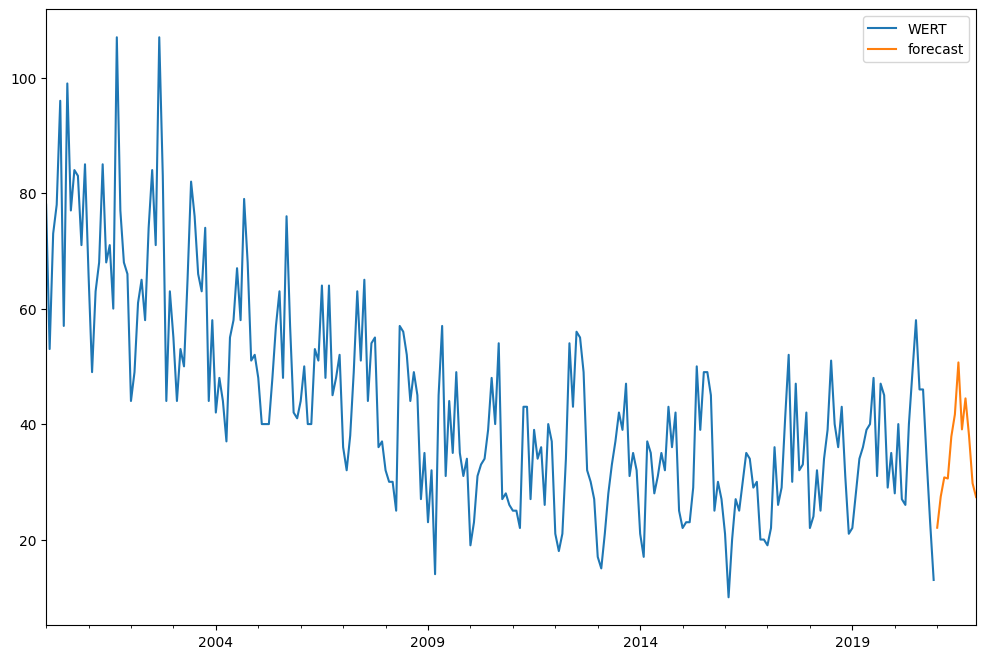

In [51]:
future_df['forecast'] = model_SARIMA_fit.predict(start = pred_future_start_date , end = pred_future_end_date)  
future_df[['WERT', 'forecast']].plot(figsize=(12, 8))
future_df.tail(12)

Calculating Residuals for the above predicted values w.r.t ground truth values

In [52]:
prediction=future_df['forecast'].tail(12)
residuals=part2['WERT']-prediction
residuals

date
2021-01-01    -6.048068
2021-02-01   -13.438505
2021-03-01    -6.766735
2021-04-01   -14.568512
2021-05-01   -13.855028
2021-06-01     6.331763
2021-07-01    -6.681486
2021-08-01     6.916819
2021-09-01     9.547074
2021-10-01     5.013261
2021-11-01     3.250023
2021-12-01    -6.360432
dtype: float64

Visualizing the above predictions i.e., for the year 2021

In [53]:
part2['Predicted_SARIMA']=prediction
part2

C:\Users\siddh\AppData\Local\Temp\ipykernel_20792\3510491036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part2['Predicted_SARIMA']=prediction


,WERT,Predicted_ARIMA,Predicted_SARIMA
date,,,
2021-01-01,16.0,25.622543,22.048068
2021-02-01,14.0,30.675038,27.438505
2021-03-01,24.0,32.697428,30.766735
2021-04-01,16.0,33.506941,30.568512
2021-05-01,24.0,33.830969,37.855028
2021-06-01,48.0,33.960670,41.668237
2021-07-01,44.0,34.012586,50.681486
2021-08-01,46.0,34.033366,39.083181
2021-09-01,54.0,34.041684,44.452926


<Axes: xlabel='date'>

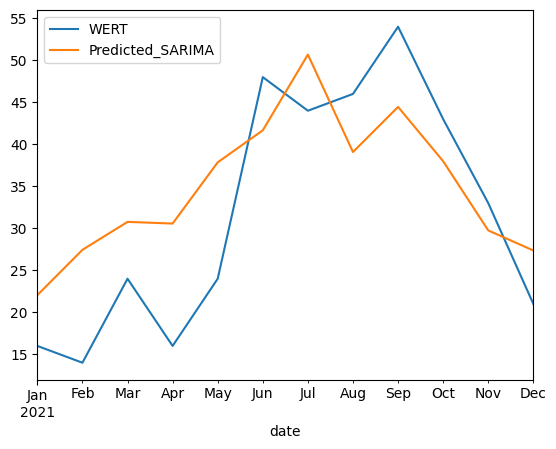

In [54]:
part2[['WERT','Predicted_SARIMA']].plot()

Saving our best model (SARIMA)

In [55]:
# # model_SARIMA_fit
# model_SARIMA_fit.save('sarima_model.h5')